# JAN 2005


## Risultati SR-NIEL  5mm Al   20/01 - 25/01

## Residual after 3mm Al   JAN 2005

In [7]:
import pandas as pd

file_in = "SRNIEL_output/JAN 2005/Al_3mm_residual.txt"

# Legge il file con 3 colonne
df = pd.read_csv(file_in, sep=r"\s+", comment="#", engine="python", header=0)

# Seleziona solo Energy + Residual
df2 = df.iloc[:, [0, 2]].copy()
df2.columns = ["Energy (MeV)", "Residual Spectral Fluence (MeV-1 cm-2)"]

# Forza formato numerico e rimuove righe sporche
df2 = df2.apply(pd.to_numeric, errors="coerce")
df2.dropna(inplace=True)

# Salva nel formato SR-NIEL richiesto
file_out = "Residual_3mmAl_SRINPUT.txt"
df2.to_csv(file_out, sep="\t", index=False, float_format="%.4e")

print("Creato file:", file_out)
display(df2.head(10))
display(df2.tail(10))


Creato file: Residual_3mmAl_SRINPUT.txt


,Energy (MeV),Residual Spectral Fluence (MeV-1 cm-2)
0,0.0010,238790.0
1,0.0015,238870.0
2,0.0020,238930.0
3,0.0025,238970.0
4,0.0030,239010.0
5,0.0035,239040.0
6,0.0040,239060.0
7,0.0045,239090.0
8,0.0050,239110.0
9,0.0055,239120.0


,Energy (MeV),Residual Spectral Fluence (MeV-1 cm-2)
276,1398.2,25.1130
277,1454.9,20.5030
278,1514.0,16.6550
279,1575.4,13.4560
280,1639.3,10.8120
281,1705.8,8.6376
282,1775.0,6.8593
283,1847.1,5.4132
284,1922.0,4.2446
285,2000.0,3.3065


In [ ]:
import pandas as pd

file_in = "SRNIEL_output/JAN 2005/Al_3mm_HDPE_10mm_residual_raw.txt"

# Legge il file con 3 colonne
df = pd.read_csv(file_in, sep=r"\s+", comment="#", engine="python", header=0)

# Seleziona solo Energy + Residual
df2 = df.iloc[:, [0, 2]].copy()
df2.columns = ["Energy (MeV)", "Residual Spectral Fluence (MeV-1 cm-2)"]

# Forza formato numerico e rimuove righe sporche
df2 = df2.apply(pd.to_numeric, errors="coerce")
df2.dropna(inplace=True)

# Salva nel formato SR-NIEL richiesto
file_out = "Residual_3mmAl_HDPE_10mm_RE_INPUT.txt"
df2.to_csv(file_out, sep="\t", index=False, float_format="%.4e")

print("Creato file:", file_out)
display(df2.head(100))


#Seleziona solo Energy 
df2 = df.iloc[:, [0]].copy()
df2.columns = ["Energy (MeV)"]
# Forza formato numerico e rimuove righe sporche
df2 = df2.apply(pd.to_numeric, errors="coerce")
df2.dropna(inplace=True)
# Salva nel formato SR-NIEL richiesto
file_out = "Energy_input.txt"
df2.to_csv(file_out, sep="\t", index=False, float_format="%.4e")
print("Creato file:", file_out)
display(df2.head(10))



Creato file: Residual_3mmAl_HDPE_10mm_RE_INPUT.txt


,Energy (MeV),Residual Spectral Fluence (MeV-1 cm-2)
0,0.0010,62853.0
1,0.0015,62924.0
2,0.0020,62942.0
3,0.0025,62957.0
4,0.0030,62968.0
...,...,...
95,1.0450,73734.0
96,1.0874,74196.0
97,1.1315,74678.0
98,1.1774,75180.0


In [11]:
#Seleziona solo Energy 
df2 = df.iloc[:, [0]].copy()
df2.columns = ["Energy (MeV)"]
# Forza formato numerico e rimuove righe sporche
df2 = df2.apply(pd.to_numeric, errors="coerce")
df2.dropna(inplace=True)
# Salva nel formato SR-NIEL richiesto
file_out = "Energy_input.txt"
df2.to_csv(file_out, sep="\t", index=False, float_format="%.4e")
print("Creato file:", file_out)
display(df2.head(10))


Creato file: Energy_input.txt


,Energy (MeV)
0,0.0010
1,0.0015
2,0.0020
3,0.0025
4,0.0030
5,0.0035
6,0.0040
7,0.0045
8,0.0050
9,0.0055


# Residual_3mmAl_HDPE_10mm_RE_INPUT    +    Al_3mm_HDPE_10mm_su_Si



Calcolo Dose 




In [17]:
import pandas as pd
import numpy as np

# === File di input ===
file_residual = "SRNIEL_output/JAN 2005/Residual_3mmAl_HDPE_10mm_RE_INPUT.txt"
file_dose_si  = "SRNIEL_output/JAN 2005/Al_3mm_HDPE_10mm_su_Si.txt"

# === Caricamento dati ===
df_flux = pd.read_csv(file_residual, sep=r"\s+", comment="#")
df_dose = pd.read_csv(file_dose_si, sep=r"\s+", comment="#")

# Colonne attese
E = df_flux.iloc[:, 0].values              # Energy [MeV]
phi = df_flux.iloc[:, 1].values            # Spectral fluence [MeV-1 cm-2]
SP_E = df_dose.iloc[:, 1].values           # Stopping Power [MeV cm2 g-1]
E_SP = df_dose.iloc[:, 0].values           # Energy values for stopping power

# Interpolazione Stopping Power sulla griglia del flusso residuo
SP_interp = np.interp(E, E_SP, SP_E)

# Calcolo width degli intervalli energetici (log-spaced)
dE = np.gradient(E)

# Dose differenziale in MeV g-1
Dose_diff_MeV_g = phi * SP_interp * dE

# Conversione MeV/g → Gy
# 1 MeV = 1.60218e-13 J → Dose [Gy] = J/kg = (MeV * 1.60218e-13) / (1e-3 kg/g)
Dose_diff_Gy = Dose_diff_MeV_g * 1.60218e-10

Dose_tot_Gy = np.sum(Dose_diff_Gy)

print("=== RISULTATO TOT DOSE in Si dopo 3mm Al + 10mm HDPE ===")
print(f"Dose totale = {Dose_tot_Gy:3e} Gy")


=== RISULTATO TOT DOSE in Si dopo 3mm Al + 10mm HDPE ===
Dose totale = 4.252946e-02 Gy


# EVENTO OCT 2003 


- Spettro intero evento OCT 2003 Circa 6giorni
- Range esteso 0.04 - 1000 MeV
- integrato per un fattore 2pi 



# 0° SCHERMATURA 1mm Al

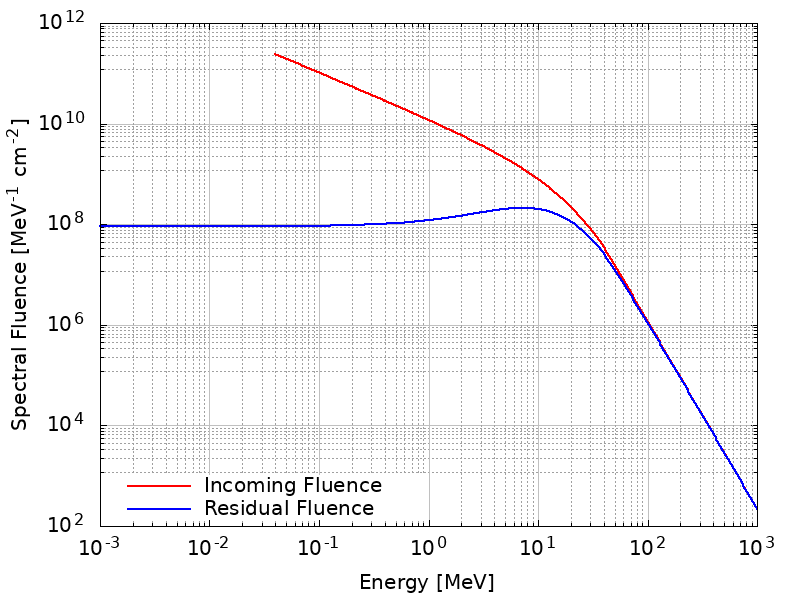

Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (1 mm Al, OCT 2003) ===
Dose totale = 3.273e-02 Gy
Dose totale = 32.729 mGy


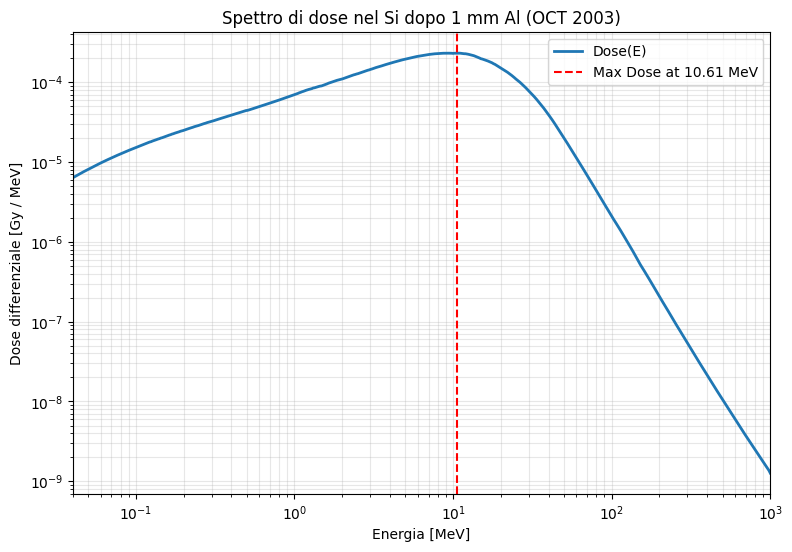

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 1 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/1mm/1mmAl_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (1 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 1 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# SCHERMATURA 2mm Al
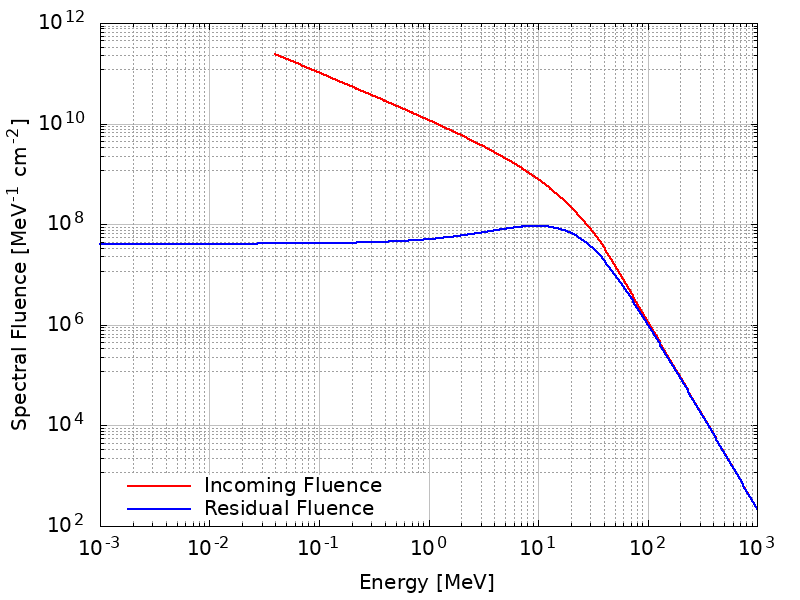

Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (2 mm Al, OCT 2003) ===
Dose totale = 1.538e-02 Gy
Dose totale = 15.384 mGy


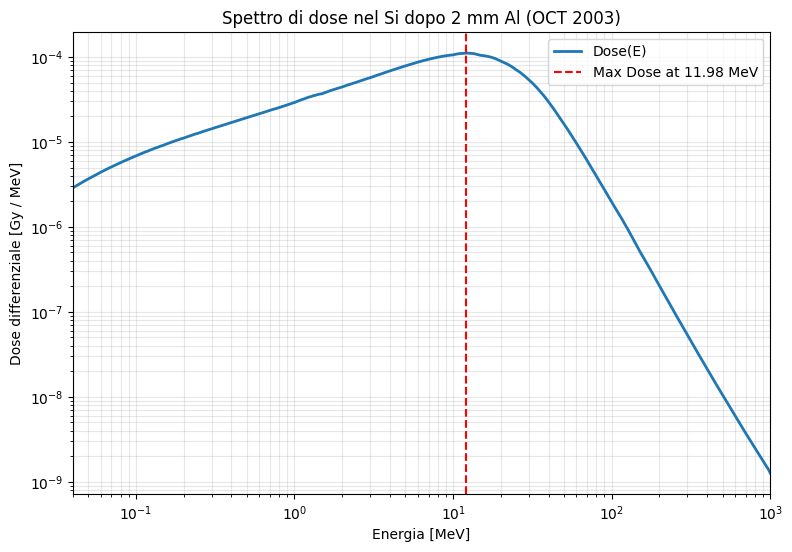

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 2 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/2mm/2mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (2 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 2 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 1° SCHERMATURA 3mm Al


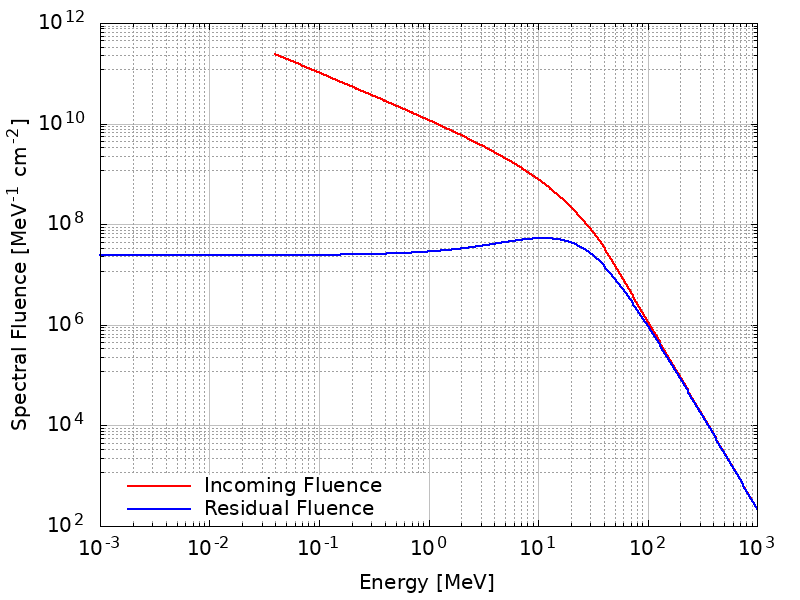

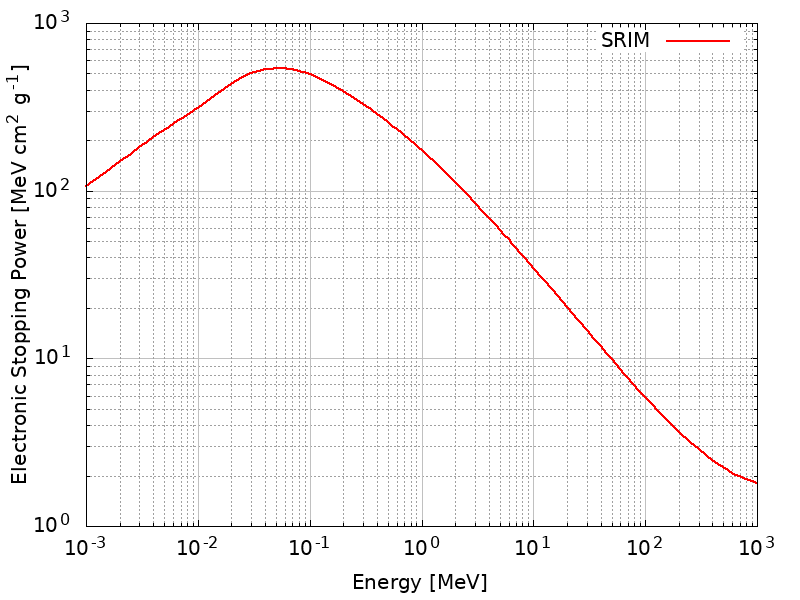

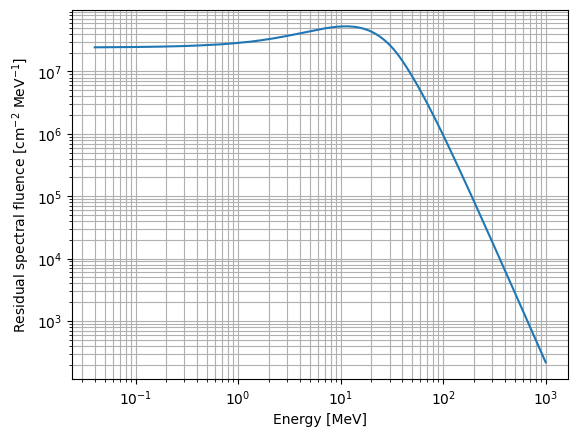

In [ ]:
# Input file caricamento

import numpy as np

# carica tutte e 3 le colonne
E, Phi_in, Phi_res = np.loadtxt(
    "SRNIEL_output/OCT 2003/3mm/3mmAl_residual_fluence.txt",
    unpack=True
)


#Filtro righe sensate

mask = Phi_in > 0
E = E[mask]
Phi_res = Phi_res[mask] 

import matplotlib.pyplot as plt

plt.loglog(E, Phi_res)
plt.xlabel("Energy [MeV]")
plt.ylabel("Residual spectral fluence [cm$^{-2}$ MeV$^{-1}$]")
plt.grid(True, which="both")
plt.show()




Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (3 mm Al, OCT 2003) ===
Dose totale = 9.171e-03 Gy
Dose totale = 9.171 mGy


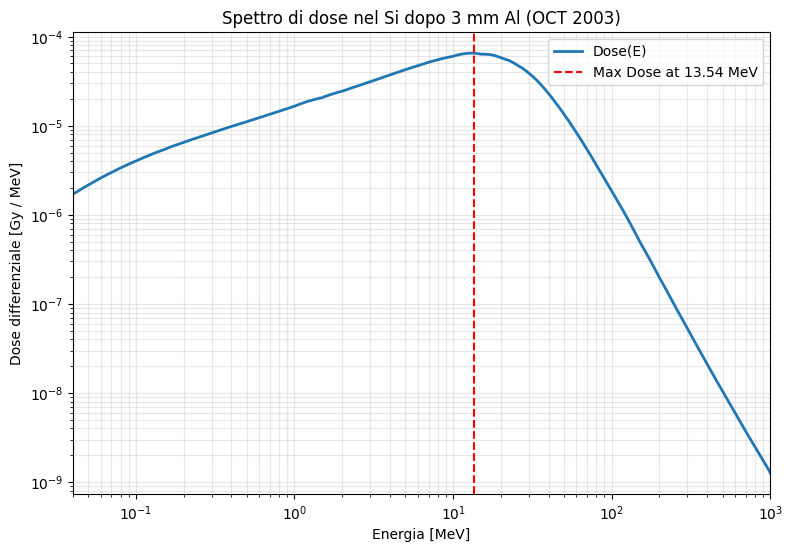

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 3 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/3mm/3mmAl_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (3 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 3 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 2° SCHERMATURA 5mm Al

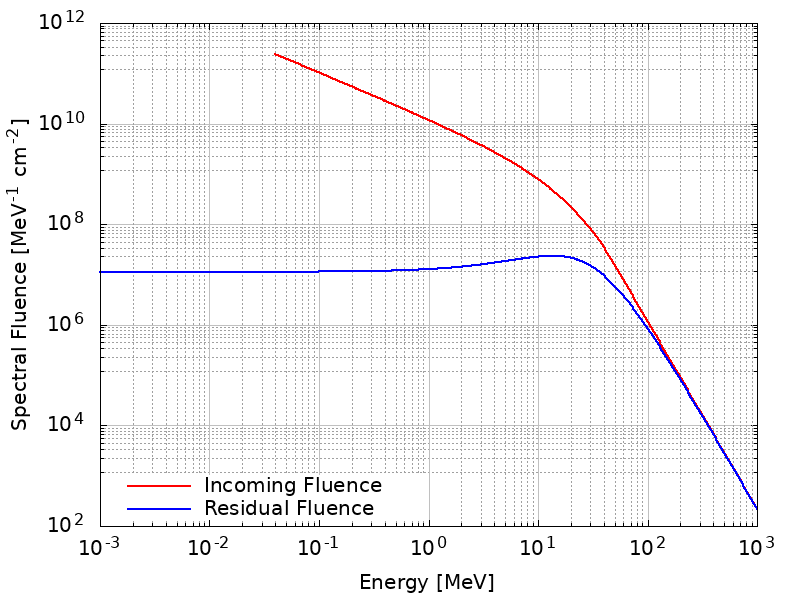

Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (5 mm Al, OCT 2003) ===
Dose totale = 4.330e-03 Gy
Dose totale = 4.330 mGy


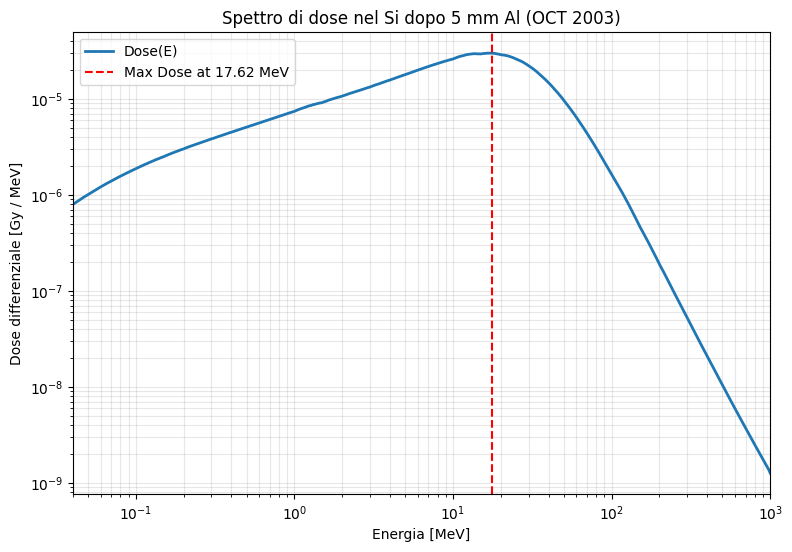

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 3 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/5mm/5mmAl_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (5 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 5 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 3° SCHERMATURA 10mm Al

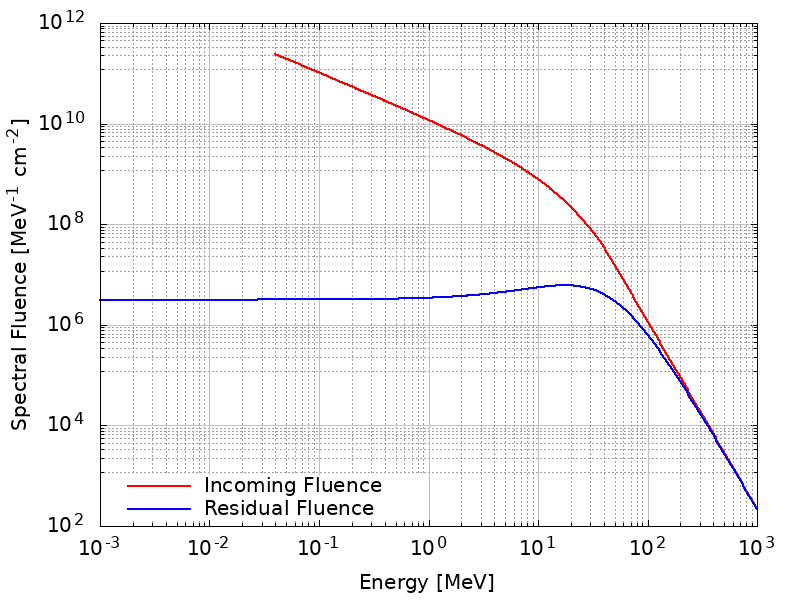

Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (10 mm Al, OCT 2003) ===
Dose totale = 1.271e-03 Gy
Dose totale = 1.271 mGy


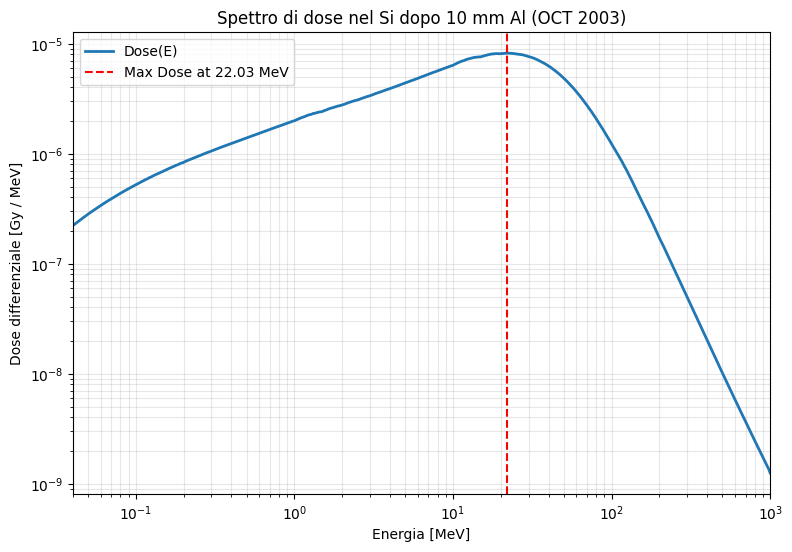

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 10 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/10mm/10mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (10 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 10 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 4° SCHERMATURA 20mm Al

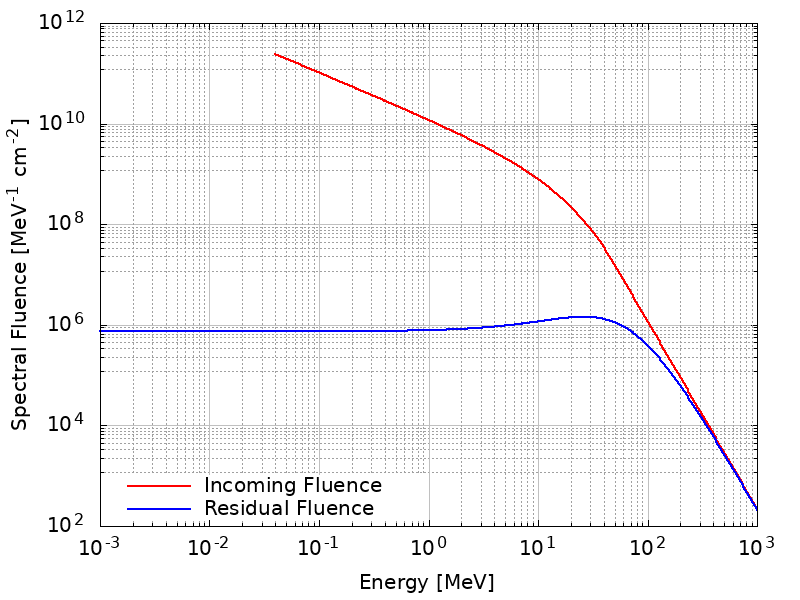

Fluenza residua: 524 punti
SRIM: 109 punti

=== DOSE TOTALE NEL Si (20 mm Al, OCT 2003) ===
Dose totale = 3.334e-04 Gy
Dose totale = 0.333 mGy


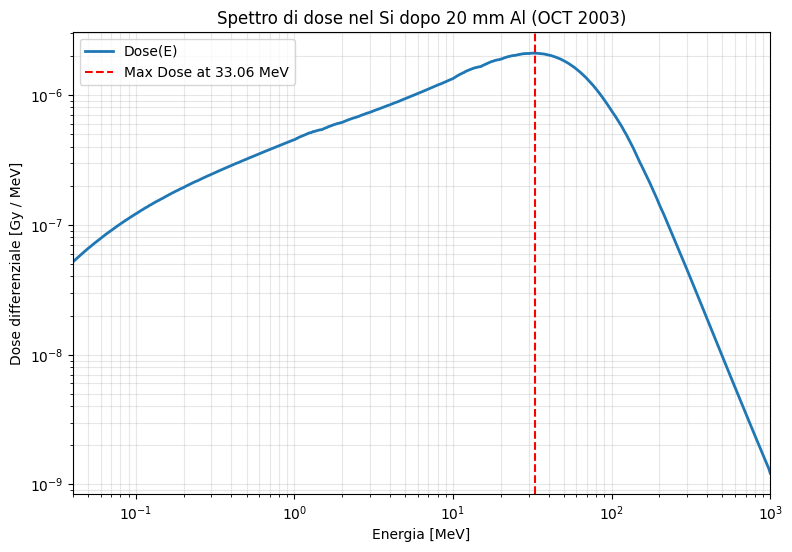

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 20 mm Al
# =========================================================
file_fluence = "SRNIEL_output/OCT 2003/20mm/20mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/OCT 2003/3mm/3mmAl_stopping_power.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (20 mm Al, OCT 2003) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 20 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# Vecchio test iniziale 5mm

## Calcolo Dose per 5mm Al SCHERMATURA 1



In [37]:
import numpy as np

# ==========================================
# 1) CARICO FILE FLUENZA RESIDUA (286 punti)
# ==========================================
file_fluence = "SRNIEL_output/OCT 2003/5mmAl_OCT2003_E_Fluence_res.txt"

E_res, Phi_res = np.loadtxt(file_fluence, skiprows=1, unpack=True)

print("Fluenza: ", len(E_res), "punti")

# ==========================================
# 2) CARICO FILE SRIM (357 punti)
# ==========================================
file_srim = "SRNIEL_output/OCT 2003/5mm_Al_OCT2003_After_stoppingpower.txt"

E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=[0,1], unpack=True)

print("SRIM:", len(E_srim), "punti")

# ==========================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# ==========================================
S_interp = np.interp(E_res, E_srim, S_srim)

print("Interpolazione OK")

# ==========================================
# 4) CALCOLO PASSO ENERGETICO ΔE
# (ultima cella ha stesso ΔE dell precedente)
# ==========================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# ==========================================
# 5) CALCOLO DOSE SPETTRALE
# ==========================================
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy:
# 1 MeV = 1.602e-13 J → 1 Gy = 1 J/kg
Dose_Gy = Dose_MeV_g * 1.602e-10

# ==========================================
# 6) SALVO RISULTATO
# ==========================================
out = np.column_stack([E_res, Phi_res, S_interp, Dose_MeV_g, Dose_Gy])
np.savetxt("Dose_result_5mmAl_OCT2003.txt",
           out,
           header="Energy(MeV)  Phi_res(p/cm2/MeV)  S(MeV*cm2/g)  Dose(MeV/g)  Dose(Gy)",
           fmt="%.6e")

print("File salvato: Dose_result_5mmAl_OCT2003.txt")


Fluenza:  286 punti
SRIM: 395 punti
Interpolazione OK
File salvato: Dose_result_5mmAl_OCT2003.txt


In [38]:
import numpy as np

# Carico il file generato
data = np.loadtxt("SRNIEL_output/OCT 2003/Dose_result_5mmAl_OCT2003.txt", skiprows=1)

# Estraggo la colonna della dose in Gy
Dose_Gy = data[:, -1]

# Calcolo dose totale
Dose_total = np.sum(Dose_Gy)

print("Dose totale depositata nel Si dopo 5 mm Al (evento OCT 2003):")
print(f"{Dose_total:.3e} Gy")


Dose totale depositata nel Si dopo 5 mm Al (evento OCT 2003):
4.342e-03 Gy


Dose totale integrata per EVENTO SEP OCT 2003:
4.3421e-03 Gy   =  4.342 mGy


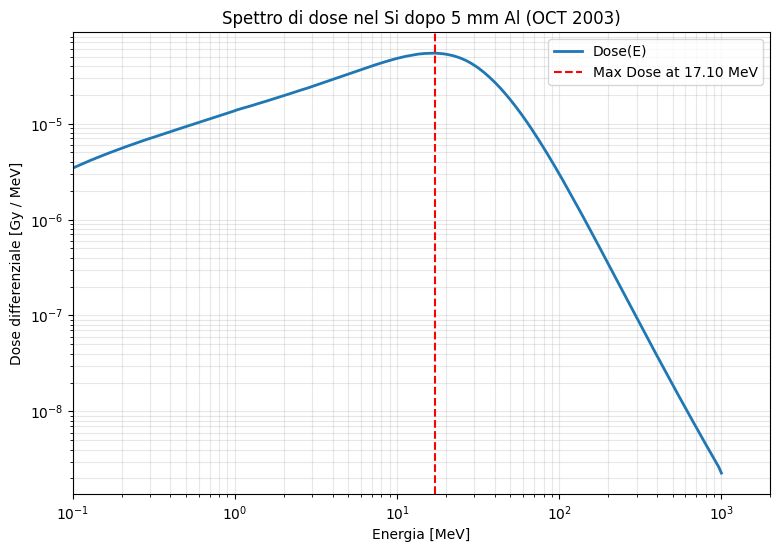

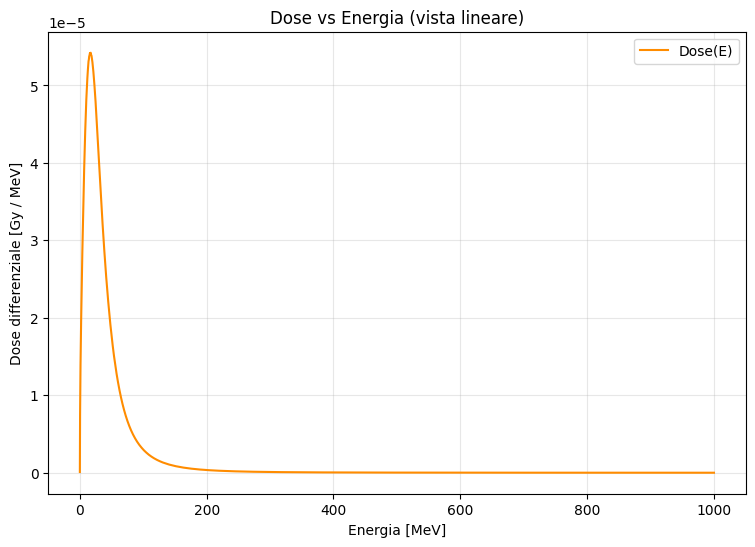

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1) Caricamento dati
# ============================
data = np.loadtxt("SRNIEL_output/OCT 2003/Dose_result_5mmAl_OCT2003.txt", skiprows=1)

E = data[:,0]                 # Energy(MeV)
Phi = data[:,1]               # Fluence_res (non serve per il grafico della dose)
S   = data[:,2]               # Stopping power (MeV cm2/g)
Dose_MeV_g = data[:,3]        # Dose(MeV/g)
Dose_Gy = data[:,4]           # Dose(Gy)

# ============================
# 2) Dose totale
# ============================
Dose_tot = np.sum(Dose_Gy)

print("Dose totale integrata per EVENTO SEP OCT 2003:")
print(f"{Dose_tot:.4e} Gy   =  {Dose_tot*1000:.3f} mGy")

# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))
plt.loglog(E, Dose_Gy, label="Dose(E)", linewidth=2)
plt.xlim(0.1, 2000)
#calcola max e plotta linea
max_index = np.argmax(Dose_Gy)
max_energy = E[max_index]
plt.axvline(x=max_energy, color='r', linestyle='--', label=f'Max Dose at {max_energy:.2f} MeV')
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 5 mm Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# ============================
# 4) Grafico lin-lin (per capire i contributi)
# ============================
plt.figure(figsize=(9,6))
plt.plot(E, Dose_Gy, label="Dose(E)", color="darkorange")

plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Dose vs Energia (vista lineare)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Dose totale = 0.43rad(Si)

- per un singolo evento SEP, contributo solo da Protoni nel range standardizzato 0.1MeV-1000MeV,  dietro 5mm Al è plausibile



- Per dare una stima rapida usando i rapporti di composizione per eventi come OCT 2003 

$$D_{tot} = D_{p} + D_{\alpha} + D_{Z>2}$$


## Stima dose considerando anche Alpha 

- Assumo frazione He/H = 5%
- Assumo stopping power S_alpha / S_protoni = 4.5 (valore medio nel range 10-100 MeV)


In [23]:
import numpy as np

# ============================
# 1) Leggo il file della dose (solo protoni)
# ============================
data = np.loadtxt("SRNIEL_output/OCT 2003/Dose_result_5mmAl_OCT2003.txt", skiprows=1)

E        = data[:,0]   # MeV (non lo uso qui ma è comodo tenerlo)
Dose_Gy  = data[:,4]   # Dose differenziale [Gy] per bin di energia

# ============================
# 2) Dose da soli protoni
# ============================
D_protoni = np.sum(Dose_Gy)   # Gy

# ============================
# 3) Stima dose da ioni alfa
# ============================
He_over_H = 0.05   # ~5% (tipico SEP)
S_ratio   = 4.5   # S_alpha / S_protoni in Si (ordine di grandezza)

D_alpha = D_protoni * He_over_H * S_ratio
D_tot   = D_protoni + D_alpha

incremento_percent = (D_tot / D_protoni - 1.0) * 100.0

print(f"Dose protoni (Gy): {D_protoni:.4e}  = {D_protoni*1e3:.3f} mGy")
print(f"Dose alfa   (Gy): {D_alpha:.4e}  = {D_alpha*1e3:.3f} mGy")
print(f"Dose totale (Gy): {D_tot:.4e}  = {D_tot*1e3:.3f} mGy\n")
print(f"Incremento percentuale rispetto ai soli protoni: {incremento_percent:.1f} %")



Dose protoni (Gy): 4.3421e-03  = 4.342 mGy
Dose alfa   (Gy): 9.7697e-04  = 0.977 mGy
Dose totale (Gy): 5.3190e-03  = 5.319 mGy

Incremento percentuale rispetto ai soli protoni: 22.5 %


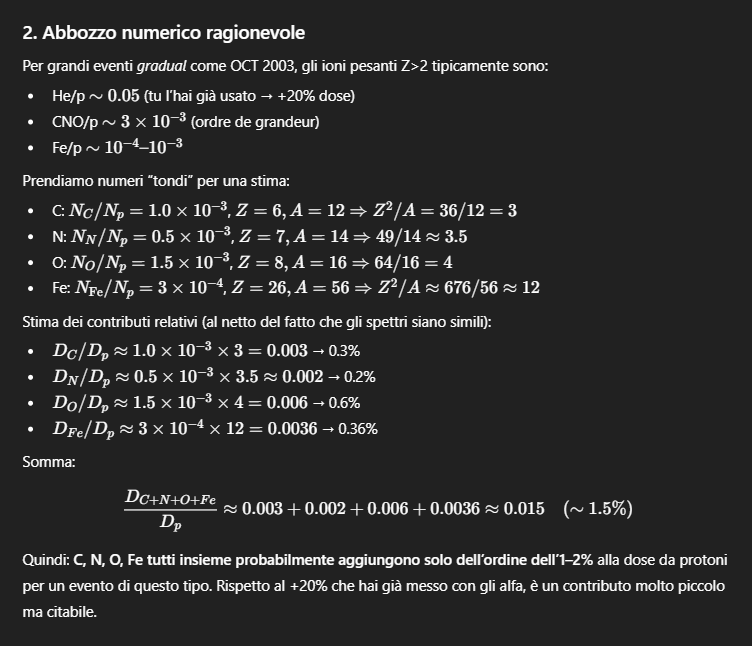


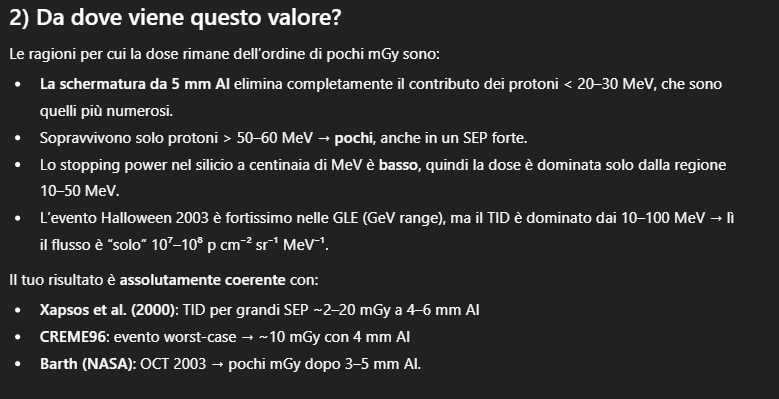

La sonda MSL/RAD nel 2012 era in viaggio verso marte e ha stimato una dose totale assorbita di 3-5 mGy , stimando circa 1mGy per SEP 

Questo valore è citato in:

Hassler et al. 2014, Science

Zeitlin et al. 2013, Science

l'evento di OCT 2003 è molto più grande quindi solo lui ha contributo dose 4.3 mGy quanto tutti i 5 SEP del viaggio MSL assieme 



Per un viaggio interplanetario di circa 6 mesi si verificano 
3-7 SEP moderati --> Dose attesa 3-20 mGy
1 SEP forte --> Dose attesa puo raggiungere 50mGy 

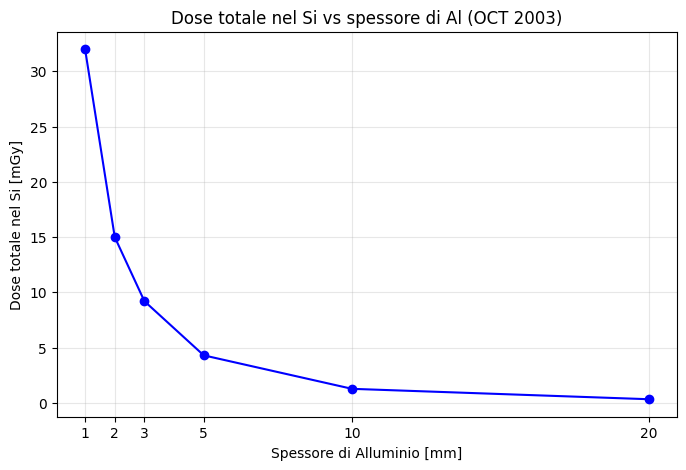

In [64]:
# Plot dose vs spessori per OCT 2003
import numpy as np
import matplotlib.pyplot as plt
thickness_mm = np.array([1, 2, 3, 5, 10, 20])
dose_mGy = np.array([32, 15, 9.2, 4.3, 1.27, 0.33])  # dose in mGy
plt.figure(figsize=(8,5))
plt.plot(thickness_mm, dose_mGy, marker='o', linestyle='-', color='b')
plt.xlabel("Spessore di Alluminio [mm]")
plt.ylabel("Dose totale nel Si [mGy]")
plt.title("Dose totale nel Si vs spessore di Al (OCT 2003)")
plt.grid(True, which="both", alpha=0.3)
plt.xticks(thickness_mm)
plt.show()



# EVENTO JAN 2005

# 1mm Al


Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (1 mm Al, JAN 2005) ===
Dose totale = 8.140e-03 Gy
Dose totale = 8.140 mGy


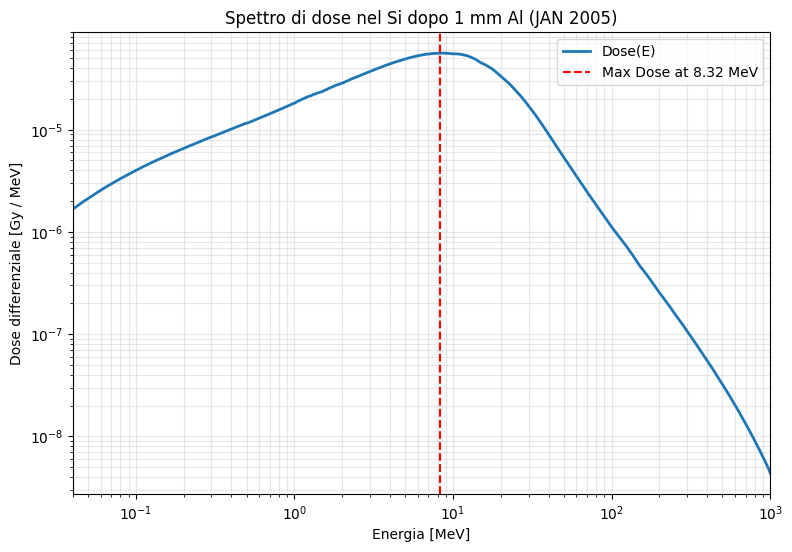

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 1 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/1mm/1mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (1 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 1 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 1mm Al con Band

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (1 mm Al, JAN 2005) ===
Dose totale = 8.188e-03 Gy
Dose totale = 8.188 mGy


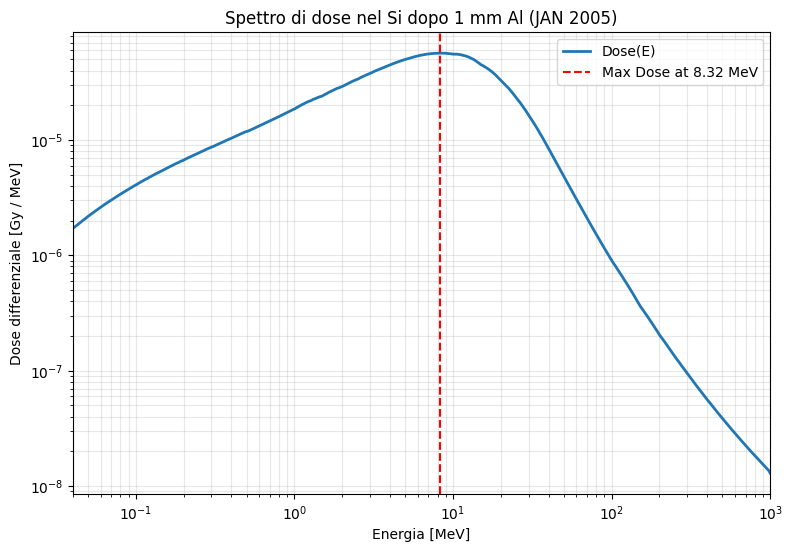

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 1 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/1mm/1mm_Al_residual_fluence_band.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (1 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 1 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 2mm Al

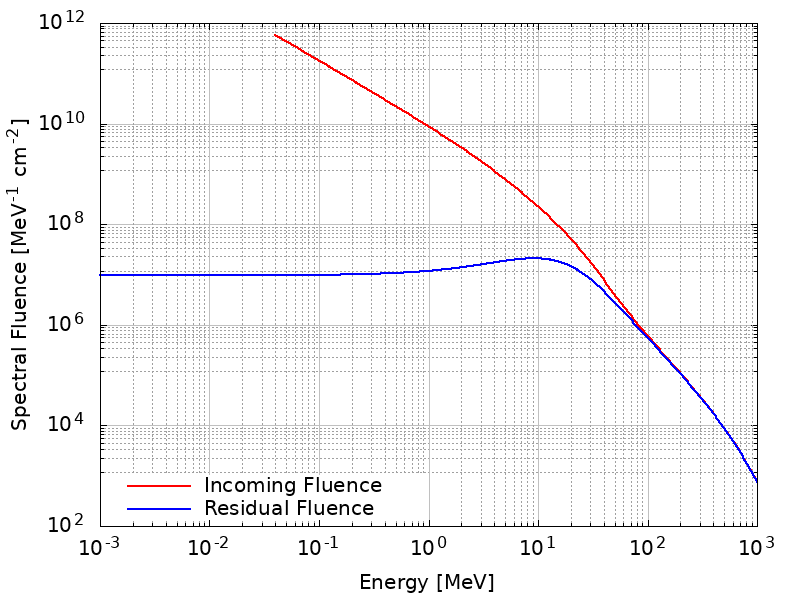

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (2 mm Al, JAN 2005) ===
Dose totale = 3.571e-03 Gy
Dose totale = 3.571 mGy


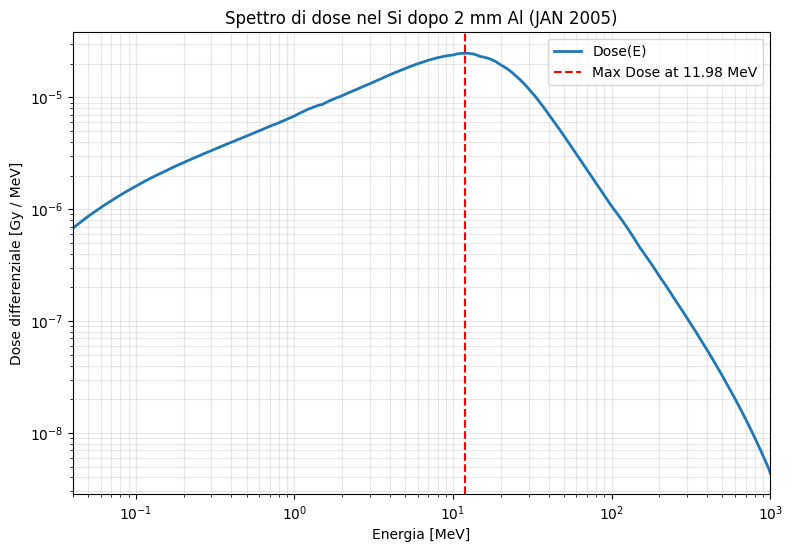

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 2 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/2mm/2mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (2 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 2 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 3mm Al
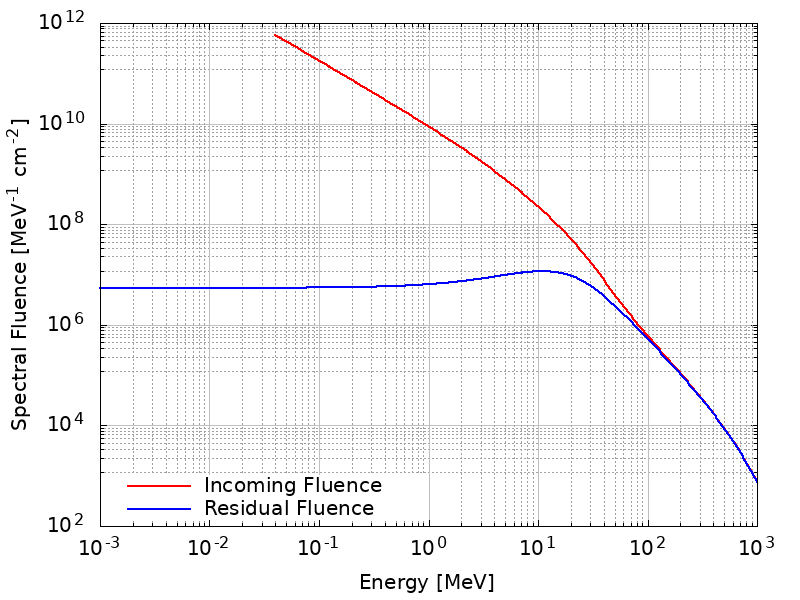

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (3 mm Al, JAN 2005) ===
Dose totale = 2.098e-03 Gy
Dose totale = 2.098 mGy


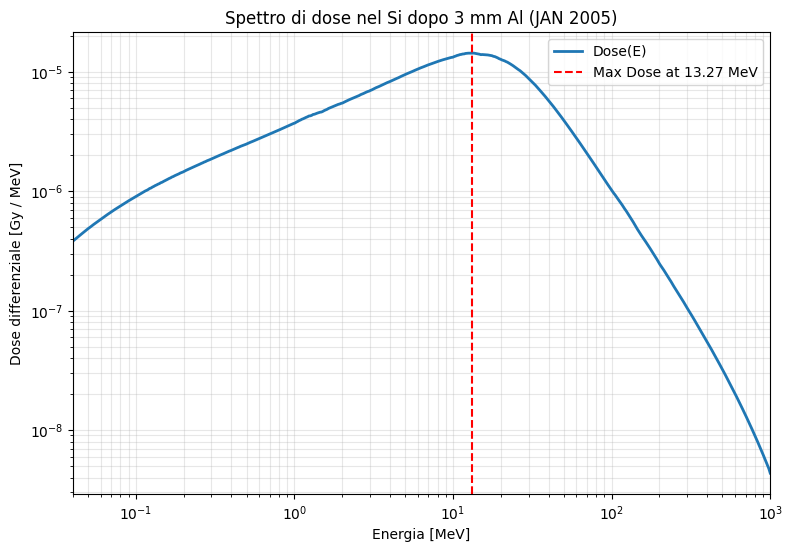

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 3 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/3mm/3mmAl_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (3 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 3 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 5mm AL
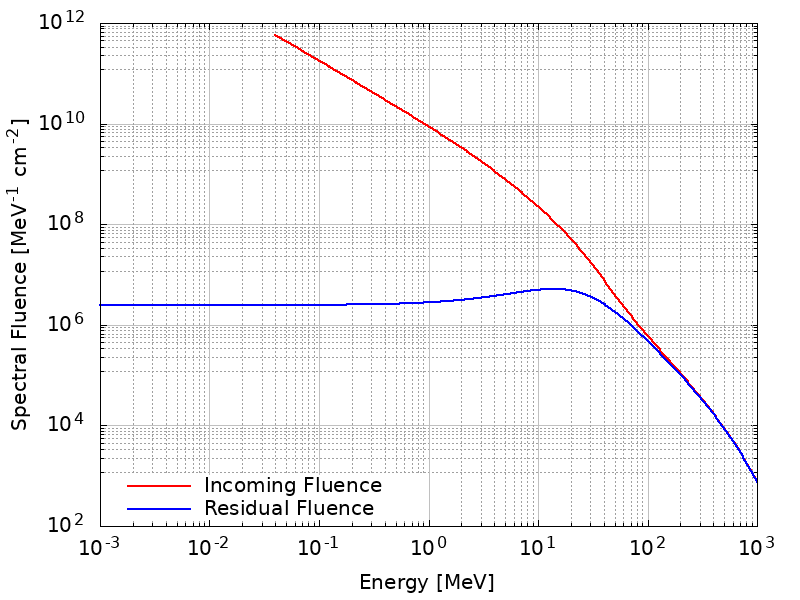

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (5 mm Al, JAN 2005) ===
Dose totale = 1.018e-03 Gy
Dose totale = 1.018 mGy


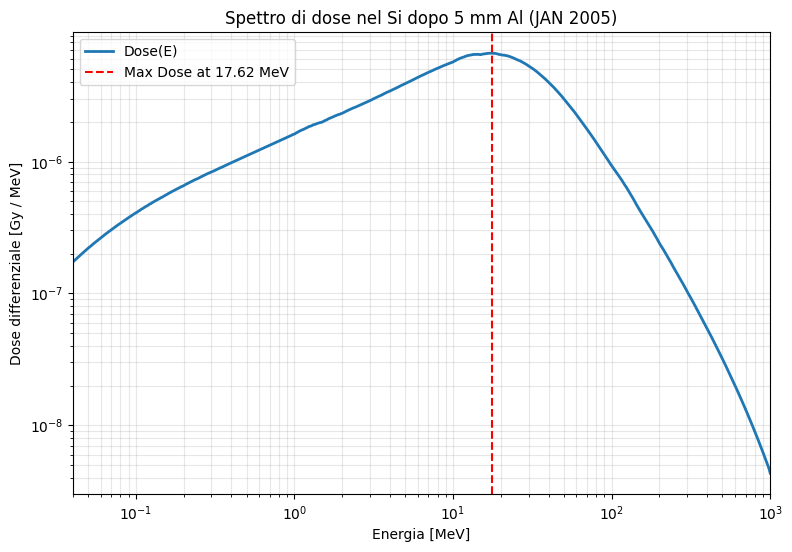

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 5 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/5mm/5mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (5 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 5 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 10mm Al
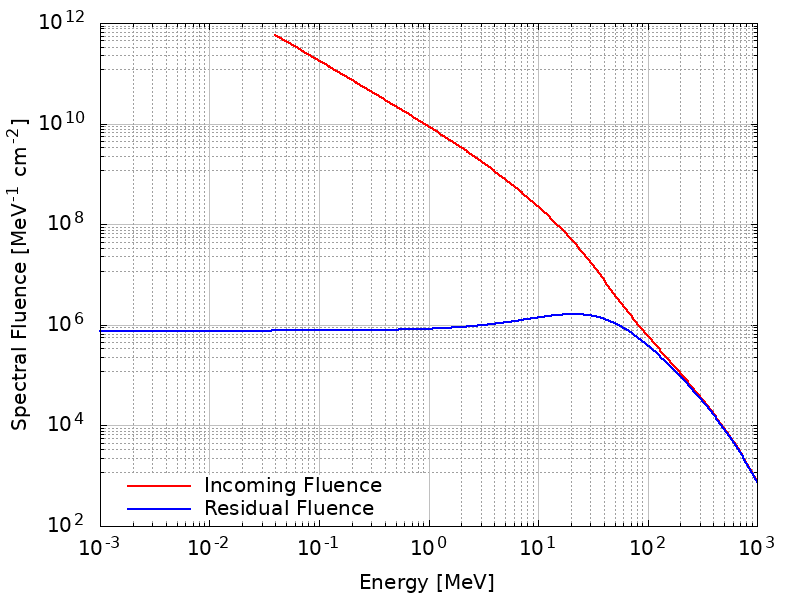

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (10 mm Al, JAN 2005) ===
Dose totale = 3.672e-04 Gy
Dose totale = 0.367 mGy


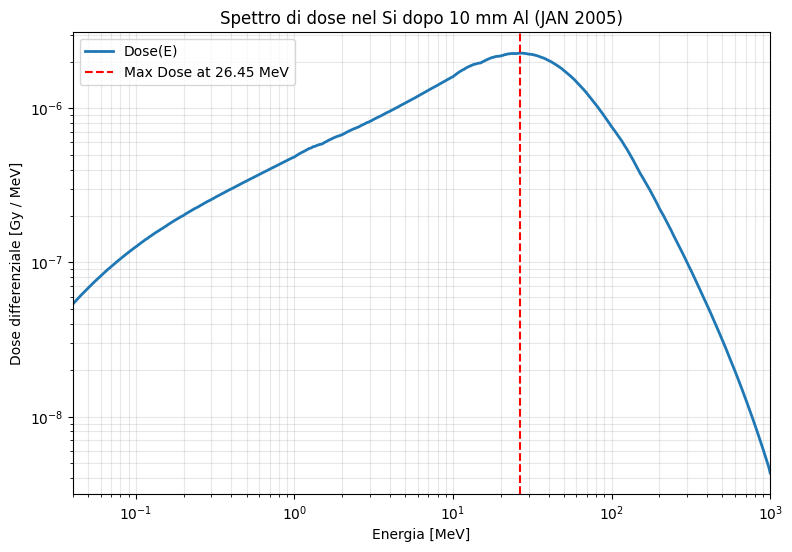

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 10 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/10mm/10mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (10 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 10 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# 20mm Al
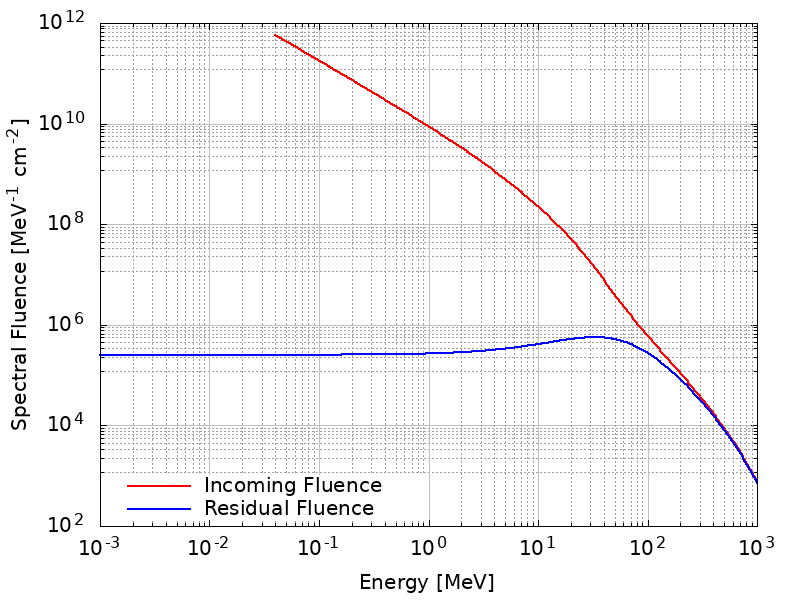

Fluenza residua: 524 punti
SRIM: 85 punti

=== DOSE TOTALE NEL Si (20 mm Al, JAN 2005) ===
Dose totale = 1.422e-04 Gy
Dose totale = 0.142 mGy


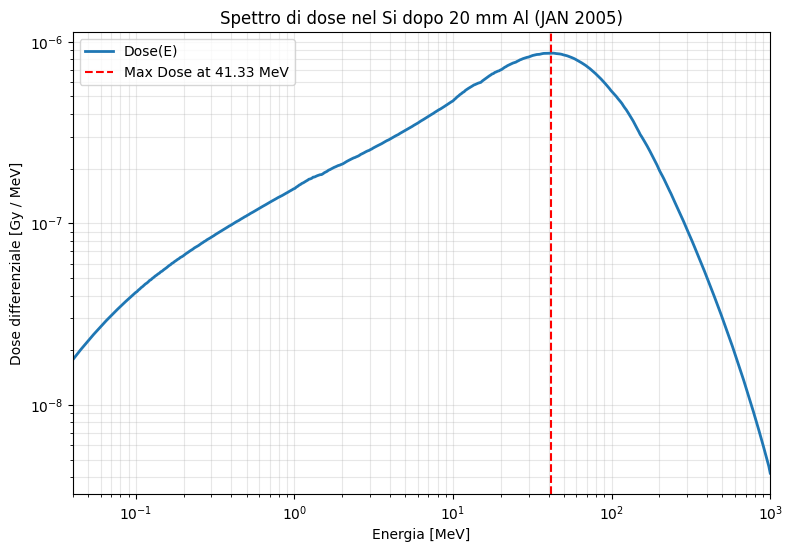

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 1) CARICO FLUENZA RESIDUA DOPO 20 mm Al
# =========================================================
file_fluence = "SRNIEL_output/JAN 2005/20mm/20mm_Al_residual_fluence.txt"

# colonne: Energy [MeV], Phi_in, Phi_res [p/cm2/MeV]
E_res, Phi_in, Phi_res = np.loadtxt(file_fluence, unpack=True,skiprows=1)

# filtro valori fisici
mask = Phi_res > 0
E_res = E_res[mask]
Phi_res = Phi_res[mask]

print("Fluenza residua:", len(E_res), "punti")

# =========================================================
# 2) CARICO STOPPING POWER (SRIM) PER Si
# =========================================================
file_srim = "SRNIEL_output/JAN 2005/Stopping_power_0.04_1000-MeV.txt"

# colonne: Energy [MeV], S(E) [MeV cm2 / g]
E_srim, S_srim = np.loadtxt(file_srim, skiprows=1, usecols=(0,1), unpack=True)

print("SRIM:", len(E_srim), "punti")

# =========================================================
# 3) INTERPOLAZIONE SRIM SULLA GRIGLIA DELLA FLUENZA
# =========================================================
S_interp = np.interp(E_res, E_srim, S_srim)

# =========================================================
# 4) PASSO ENERGETICO ΔE (NO gradient!)
# =========================================================
dE = np.diff(E_res)
dE = np.append(dE, dE[-1])   # stessa lunghezza

# =========================================================
# 5) DOSE DIFFERENZIALE
# =========================================================
# Dose(E) = Phi(E) * S(E) * dE
Dose_MeV_g = Phi_res * S_interp * dE

# conversione MeV/g → Gy
# 1 MeV = 1.602e-13 J
Dose_Gy = Dose_MeV_g * 1.602e-13

# =========================================================
# 6) DOSE TOTALE
# =========================================================
Dose_tot = np.sum(Dose_Gy)

print("\n=== DOSE TOTALE NEL Si (20 mm Al, JAN 2005) ===")
print(f"Dose totale = {Dose_tot:.3e} Gy")
print(f"Dose totale = {Dose_tot*1e3:.3f} mGy")



# ============================
# 3) Grafico log-log
# ============================
plt.figure(figsize=(9,6))

plt.loglog(E_res, Dose_Gy, label="Dose(E)", linewidth=2)

# massimo contributo
max_index = np.argmax(Dose_Gy)
max_energy = E_res[max_index]
plt.axvline(
    x=max_energy,
    color='r',
    linestyle='--',
    label=f"Max Dose at {max_energy:.2f} MeV"
)

plt.xlim(0.04, 1000)
plt.xlabel("Energia [MeV]")
plt.ylabel("Dose differenziale [Gy / MeV]")
plt.title("Spettro di dose nel Si dopo 20 mm Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()

# PLOT DOSE vs Spessore

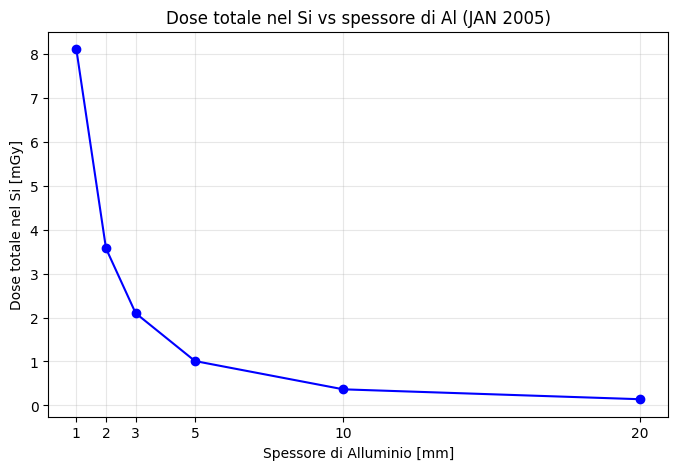

In [72]:
# Plot dose vs spessori per JAN 2005
import numpy as np
import matplotlib.pyplot as plt
thickness_mm = np.array([1, 2, 3, 5, 10, 20])
dose_mGy = np.array([8.1, 3.571, 2.098, 1.01, 0.367, 0.142])  # dose in mGy
plt.figure(figsize=(8,5))
plt.plot(thickness_mm, dose_mGy, marker='o', linestyle='-', color='b')
plt.xlabel("Spessore di Alluminio [mm]")
plt.ylabel("Dose totale nel Si [mGy]")
plt.title("Dose totale nel Si vs spessore di Al (JAN 2005)")
plt.grid(True, which="both", alpha=0.3)
plt.xticks(thickness_mm)
plt.show()



# EVENTO JUL 2012


# EVENTO SEP 2017